In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)
%cd "/content/drive/My Drive/automatic-asset-classification"
%ls "/content/drive/My Drive/automatic-asset-classification"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/automatic-asset-classification
data/


In [0]:
np.random.seed(3333)
torch.manual_seed(3333)
image_path = "/content/drive/My Drive/automatic-asset-classification/data/final_dataset"
size = 224
batchsize = 32

tfms = get_transforms(do_flip = True)
src = (ImageImageList.from_folder(image_path).split_by_rand_pct().label_from_func(lambda x: x))
data = (src.transform(tfms, size=size, tfm_y=True)
        .databunch(bs=batchsize)
        .normalize(imagenet_stats, do_y = False))

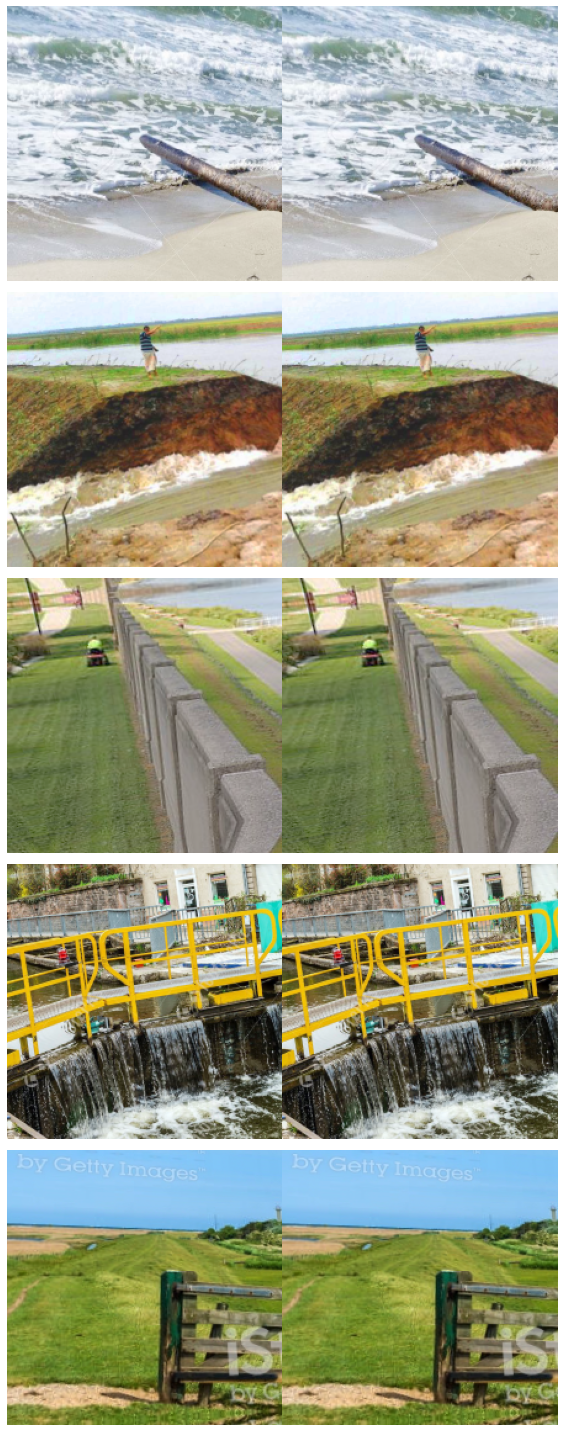

In [12]:
data.show_batch(ds_type=DatasetType.Train)

In [0]:
class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor = 2, mode = 'bilinear'),
            nn.Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
            nn.ReLU(inplace=True)
        )
        
    def encode(self,x): return self.encoder(x)
    
    def decode(self,x): return torch.clamp(self.decoder(x), min = 0, max=1)
        

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return torch.clamp(decoded, min=0, max=1)

In [0]:
autoencoder = AutoEncoder()

In [0]:
learn = Learner(data, autoencoder, loss_func=F.mse_loss);

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.060760,0.055495,00:19


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,0.042996,#na#,00:14
1,0.042970,#na#,00:14
2,0.042519,#na#,00:15
3,0.042224,#na#,00:14
4,0.041744,#na#,00:14
5,0.048427,#na#,00:14
6,0.066411,#na#,00:14
7,0.079897,#na#,00:14


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06
Min loss divided by 10: 7.59E-04


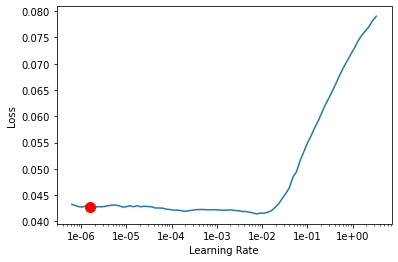

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(100, max_lr = 1e-03)

epoch,train_loss,valid_loss,time
0,0.042320,0.043790,00:18
1,0.041190,0.040981,00:18
2,0.040287,0.039199,00:19
3,0.039456,0.037471,00:18
4,0.038792,0.036333,00:18
5,0.037767,0.034804,00:18
6,0.036721,0.032658,00:18
7,0.035423,0.029648,00:18
8,0.033823,0.026531,00:18
9,0.031818,0.029563,00:18


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
# learn.save('ae_1_31_3_2020')  -> without clamp     train loss 0.001719	 valid loss 0.001348	
learn.save('ae_12_31_3_2020')  # withclamp                      0.001814	            0.001162

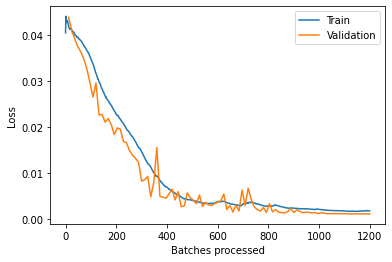

In [0]:
learn.recorder.plot_losses()

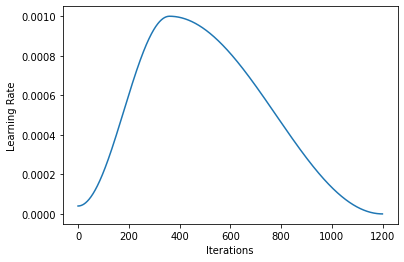

In [0]:
learn.recorder.plot_lr()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


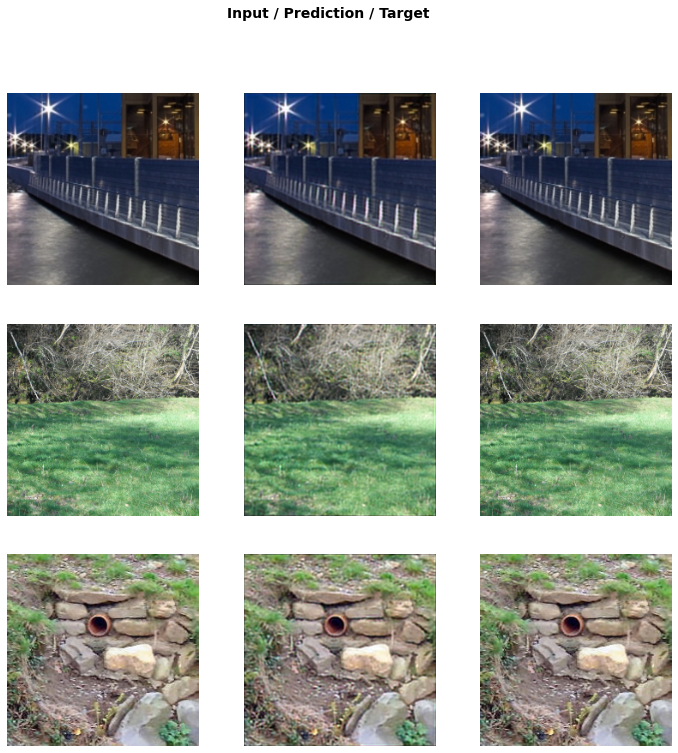

In [0]:
learn.show_results(ds_type=DatasetType.Valid, rows =3)

In [0]:
x_test = next(iter(data.train_dl))

In [0]:
x_test[0].shape

torch.Size([32, 3, 224, 224])

In [0]:
full_up = [items for items in iter(data.train_dl)]

In [0]:
len(full_up)

12

In [0]:
full_up[0][0].shape

torch.Size([32, 3, 224, 224])

In [0]:
full_up = [items for items in iter(data.train_dl)]

In [0]:
len(full_up)
for tup in full_up:
  print(tup[0].shape, tup[1].shape)

torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224]) torch.Size([32, 3, 224, 224])


In [0]:
full_up = [items for items in iter(data.train_dl)]

In [0]:
len(full_up)

12

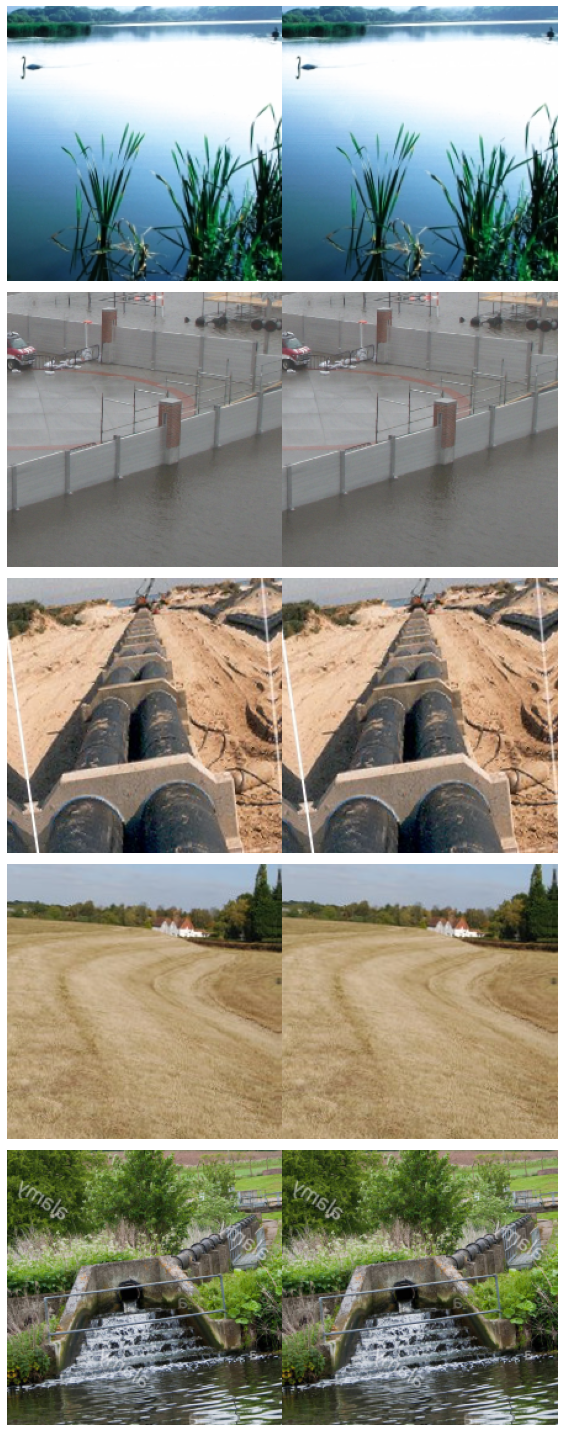

In [0]:
data.show_batch()

In [0]:
learn = Learner(data, autoencoder, loss_func=F.mse_loss);

In [0]:
learn = learn.load('ae_12_31_3_2020')

In [0]:
batches = [item[0] for item in iter(data.train_dl)]

In [47]:
len(batches)

12

In [0]:
valid_batches = [item[0] for item in iter(data.valid_dl)]

In [0]:
autoencoder.eval()
encoded_train_batches = [];
encoded_valid_batches = [];

with torch.no_grad():

  for train in batches:
    encoded_train = autoencoder.encode(train);
    encoded_train_batches.append(encoded_train);
  
  for valid in valid_batches:
    encoded_valid = autoencoder.encode(valid);
    encoded_valid_batches.append(encoded_valid);

In [63]:
encoded_train_batches[1].shape

torch.Size([32, 64, 112, 112])

In [64]:
len(encoded_train_batches)

12

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


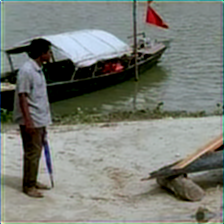

In [39]:


Image(autoencoder(data.train_ds[0][0].data.unsqueeze_(0).cuda()).squeeze(0).data)

In [0]:
class CustomDataset():
  def __init__(self,x,y): self.x,self.y = x,y
  def __len__(self): return len(self.x)
  def __getitem__(self,i): return self.x[i],self.y[i]

In [0]:
class CustomDataloader():
  def __init__(self,ds,bs): self.ds,self.bs = ds,bs
  def __iter__(self): 
    for i in range(0, len(self.ds), self.bs): yield self.ds[i:i+bs]

In [0]:
batches2 = [item[0] for item in iter(data.train_dl)]

In [76]:
(batches[1] - batches2[1]).max()

tensor(4.3542, device='cuda:0')

In [0]:
for batch in batches:
  if torch.all(torch.eq(batch, batches2[0])):
    print("YES")

There is going to be two methods to do this:
- Just use a singular dataloader as the entire dataset and then create a new dataloader from this using fastai databunch
- Constantly update the data with new draws of data from the original data loader (which will change each time)

Method Two will require alot of saving and loading of weights and bias. Method one will save time but will be constant on the transformations used.

Overall, this is just pre-training so may not make a difference. If one does not work I can also use another.

In [87]:
training_tensor = torch.cat()

torch.Size([3, 224, 224])

In [0]:
teep = [tens.cpu().numpy() for tens in batch for batch in batches]

In [122]:
ItemList(teep)
batchsize = 32
tfms = get_transforms(do_flip = True)
src = (ImageImageList.from_folder(image_path).split_by_rand_pct().label_from_func(lambda x: x))
data = (src.databunch(bs=batchsize).normalize(imagenet_stats, do_y = False))

ItemList (384 items)
[[[1.3841700553894043 1.3850432634353638 1.3736767768859863 1.3767194747924805 ... 0.6913040280342102
   0.6942832469940186 0.6781907677650452 0.6777748465538025]
  [1.4003411531448364 1.3903900384902954 1.381571650505066 1.4026800394058228 ... 0.6822865605354309
   0.6742154359817505 0.6741660237312317 0.6766691207885742]
  [1.3850778341293335 1.3870906829833984 1.3769550323486328 1.377800703048706 ... 0.6636966466903687
   0.6344524025917053 0.6419669985771179 0.6551584005355835]
  [1.3440982103347778 1.3491628170013428 1.3565478324890137 1.372706651687622 ... 0.6652594208717346
   0.6183583736419678 0.6116019487380981 0.6161636710166931]
  ...
  [-1.2259125709533691 -0.8919764757156372 -0.5977903604507446 -1.0046416521072388 ... 0.47502195835113525
   0.07778015732765198 0.49299079179763794 0.5337879657745361]
  [-0.5264931321144104 -0.1455390602350235 -0.3424660265445709 -0.6885679364204407 ... 0.5194755792617798
   0.48637545108795166 0.40607577562332153 0.483

In [82]:
batch.shape, batches2[0].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 3, 224, 224]))

In [71]:
batches2[0]

tensor([[[[ 8.0841e-01,  1.8972e+00,  1.3875e-01,  ..., -1.9363e+00,
           -1.9298e+00, -1.9234e+00],
          [ 7.3952e-01,  1.8983e+00,  2.7305e-01,  ..., -2.0508e+00,
           -1.9067e+00, -1.9572e+00],
          [ 6.5472e-01,  1.8761e+00,  3.9601e-01,  ..., -1.9421e+00,
           -1.9111e+00, -1.9618e+00],
          ...,
          [ 1.0484e+00,  9.7007e-01,  9.6905e-01,  ..., -1.6783e+00,
           -1.7323e+00, -1.6921e+00],
          [ 1.0809e+00,  1.0349e+00,  1.0502e+00,  ..., -6.3415e-01,
           -1.1784e+00, -1.2295e+00],
          [ 1.0943e+00,  1.0665e+00,  1.0589e+00,  ..., -3.1779e-01,
            4.9277e-01,  7.4947e-03]],

         [[ 1.0036e+00,  2.1081e+00,  3.2466e-01,  ..., -1.8931e+00,
           -1.8964e+00, -1.8997e+00],
          [ 9.3375e-01,  2.1093e+00,  4.6081e-01,  ..., -1.9564e+00,
           -1.8158e+00, -1.8810e+00],
          [ 8.6811e-01,  2.1010e+00,  6.0118e-01,  ..., -1.7551e+00,
           -1.7711e+00, -1.8202e+00],
          ...,
     

In [68]:
for i in range(len(data.train_ds)):
  _,act,pred = learn.predict(data.train_ds[i][0])
  diff = act-pred
  if diff.max() > 0:
    break
print(i)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for 

386


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
i

386

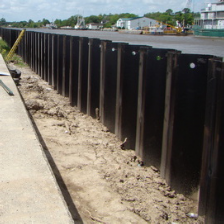

In [0]:
data.train_ds[i][0]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


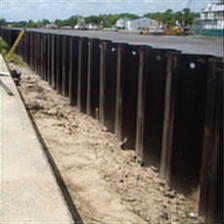

In [0]:
Image(learn.predict(data.train_ds[i][0])[-1])

In [0]:
autoencoder.eval()
#autoencoder.forward(torch.Variable(data.train_ds[i][0].data))

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Upsample(scale_factor=2.0, mode=bilinear)
    (1): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (2): ReLU(inplace=True)
  )
)

In [0]:
data.train_ds[i][0].data.unsqueeze_(0).shape

torch.Size([1, 3, 224, 224])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


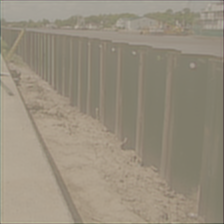

In [0]:
Image(autoencoder(data.train_ds[i][0].data.unsqueeze_(0).cuda()).data[0])

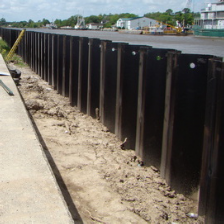

In [0]:
data.train_ds[i][0]

In [0]:
learn.model

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Upsample(scale_factor=2.0, mode=bilinear)
    (1): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (2): ReLU(inplace=True)
  )
)

In [0]:
learn.model.encoder[0].weight[0]

tensor([[[-0.0320, -0.0489, -0.0032,  0.0391, -0.0446,  0.0034, -0.0358],
         [ 0.0608,  0.0537,  0.0392,  0.0637, -0.0598, -0.0059, -0.0600],
         [ 0.0460, -0.0049,  0.0241, -0.0618,  0.0768,  0.0745, -0.0604],
         [-0.0652,  0.0019,  0.0753, -0.0299, -0.0062, -0.0387,  0.0842],
         [-0.0673, -0.0415,  0.0976, -0.0583, -0.1095,  0.0586, -0.0561],
         [ 0.0503,  0.0056,  0.0067, -0.0374,  0.0019,  0.0120,  0.0067],
         [ 0.0334, -0.0530,  0.0568, -0.0319,  0.0587, -0.0088,  0.0325]],

        [[ 0.0414, -0.0386,  0.0604,  0.0058,  0.0584, -0.0694,  0.0370],
         [ 0.0190, -0.0500, -0.0374,  0.0791, -0.0472, -0.0023,  0.0552],
         [-0.0436, -0.0534,  0.0193,  0.0172,  0.0538,  0.0632, -0.0188],
         [-0.0286, -0.0762,  0.0765,  0.0614, -0.0409,  0.0340,  0.0586],
         [ 0.0450,  0.0315,  0.0673,  0.0407, -0.0678, -0.0097,  0.0380],
         [-0.0463, -0.0166,  0.0172,  0.0336, -0.0413,  0.0321,  0.0971],
         [ 0.0689,  0.0165,  0.0849,

In [0]:
autoencoder.encoder[0].weight[0]

tensor([[[-0.0320, -0.0489, -0.0032,  0.0391, -0.0446,  0.0034, -0.0358],
         [ 0.0608,  0.0537,  0.0392,  0.0637, -0.0598, -0.0059, -0.0600],
         [ 0.0460, -0.0049,  0.0241, -0.0618,  0.0768,  0.0745, -0.0604],
         [-0.0652,  0.0019,  0.0753, -0.0299, -0.0062, -0.0387,  0.0842],
         [-0.0673, -0.0415,  0.0976, -0.0583, -0.1095,  0.0586, -0.0561],
         [ 0.0503,  0.0056,  0.0067, -0.0374,  0.0019,  0.0120,  0.0067],
         [ 0.0334, -0.0530,  0.0568, -0.0319,  0.0587, -0.0088,  0.0325]],

        [[ 0.0414, -0.0386,  0.0604,  0.0058,  0.0584, -0.0694,  0.0370],
         [ 0.0190, -0.0500, -0.0374,  0.0791, -0.0472, -0.0023,  0.0552],
         [-0.0436, -0.0534,  0.0193,  0.0172,  0.0538,  0.0632, -0.0188],
         [-0.0286, -0.0762,  0.0765,  0.0614, -0.0409,  0.0340,  0.0586],
         [ 0.0450,  0.0315,  0.0673,  0.0407, -0.0678, -0.0097,  0.0380],
         [-0.0463, -0.0166,  0.0172,  0.0336, -0.0413,  0.0321,  0.0971],
         [ 0.0689,  0.0165,  0.0849,

In [0]:
autoencoder(data.train_ds[i][0].data.unsqueeze_(0).cuda()).data[0]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


tensor([[[0.4740, 0.5937, 0.5791,  ..., 0.4932, 0.4941, 0.3686],
         [0.5813, 0.7019, 0.6756,  ..., 0.6086, 0.6195, 0.5365],
         [0.5537, 0.6710, 0.6510,  ..., 0.5748, 0.5703, 0.5170],
         ...,
         [0.6155, 0.7079, 0.6964,  ..., 0.5243, 0.5267, 0.3964],
         [0.6223, 0.7354, 0.7290,  ..., 0.5281, 0.5312, 0.3984],
         [0.4946, 0.6072, 0.6304,  ..., 0.3774, 0.3797, 0.2641]],

        [[0.5754, 0.5369, 0.5141,  ..., 0.4500, 0.4764, 0.3269],
         [0.5980, 0.7264, 0.6754,  ..., 0.5771, 0.6075, 0.4557],
         [0.5706, 0.6717, 0.6237,  ..., 0.5306, 0.5560, 0.4233],
         ...,
         [0.5984, 0.6821, 0.6437,  ..., 0.4983, 0.5059, 0.3421],
         [0.5894, 0.7155, 0.6891,  ..., 0.5062, 0.5136, 0.3475],
         [0.4698, 0.5956, 0.5798,  ..., 0.3853, 0.3916, 0.2649]],

        [[0.4484, 0.5144, 0.5099,  ..., 0.4418, 0.4317, 0.3551],
         [0.5891, 0.6363, 0.6084,  ..., 0.5522, 0.5650, 0.4678],
         [0.5659, 0.6079, 0.5782,  ..., 0.5049, 0.5062, 0.

In [0]:
learn.predict(data.train_ds[i][0])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


(Image (3, 224, 224),
 tensor([[[0.6608, 0.7634, 0.7574,  ..., 0.3903, 0.4142, 0.3226],
          [0.8029, 0.8159, 0.7909,  ..., 0.5160, 0.5318, 0.3919],
          [0.7683, 0.7677, 0.7444,  ..., 0.4137, 0.3815, 0.3046],
          ...,
          [0.8996, 0.9123, 0.9005,  ..., 0.1049, 0.1249, 0.1330],
          [0.9083, 0.9445, 0.9365,  ..., 0.0895, 0.0992, 0.1130],
          [0.7580, 0.8582, 0.9106,  ..., 0.1234, 0.1133, 0.0555]],
 
         [[0.8284, 0.8041, 0.7769,  ..., 0.4421, 0.4634, 0.2653],
          [0.8142, 0.9647, 0.8955,  ..., 0.5698, 0.5744, 0.3481],
          [0.7654, 0.8678, 0.7960,  ..., 0.4478, 0.4195, 0.2565],
          ...,
          [0.8450, 0.9002, 0.8439,  ..., 0.1397, 0.1136, 0.1119],
          [0.8219, 0.9571, 0.9183,  ..., 0.1056, 0.0705, 0.0669],
          [0.6701, 0.8207, 0.8000,  ..., 0.1436, 0.1146, 0.0874]],
 
         [[0.6911, 0.8272, 0.8441,  ..., 0.4485, 0.4186, 0.2585],
          [0.8641, 0.9466, 0.9334,  ..., 0.5789, 0.5784, 0.3928],
          [0.8343,

In [0]:
autoencoder.decode(autoencoder.encode(data.train_ds[i][0].data.unsqueeze_(0).cuda()))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


tensor([[[[0.4740, 0.5937, 0.5791,  ..., 0.4932, 0.4941, 0.3686],
          [0.5813, 0.7019, 0.6756,  ..., 0.6086, 0.6195, 0.5365],
          [0.5537, 0.6710, 0.6510,  ..., 0.5748, 0.5703, 0.5170],
          ...,
          [0.6155, 0.7079, 0.6964,  ..., 0.5243, 0.5267, 0.3964],
          [0.6223, 0.7354, 0.7290,  ..., 0.5281, 0.5312, 0.3984],
          [0.4946, 0.6072, 0.6304,  ..., 0.3774, 0.3797, 0.2641]],

         [[0.5754, 0.5369, 0.5141,  ..., 0.4500, 0.4764, 0.3269],
          [0.5980, 0.7264, 0.6754,  ..., 0.5771, 0.6075, 0.4557],
          [0.5706, 0.6717, 0.6237,  ..., 0.5306, 0.5560, 0.4233],
          ...,
          [0.5984, 0.6821, 0.6437,  ..., 0.4983, 0.5059, 0.3421],
          [0.5894, 0.7155, 0.6891,  ..., 0.5062, 0.5136, 0.3475],
          [0.4698, 0.5956, 0.5798,  ..., 0.3853, 0.3916, 0.2649]],

         [[0.4484, 0.5144, 0.5099,  ..., 0.4418, 0.4317, 0.3551],
          [0.5891, 0.6363, 0.6084,  ..., 0.5522, 0.5650, 0.4678],
          [0.5659, 0.6079, 0.5782,  ..., 0

In [0]:
Image(learn.get_preds(ds_type=DatasetType.Train)[i])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


IndexError: ignored

In [0]:
item = data.train_ds[i][0]
batch = learn.data.one_item(item)

In [0]:
batch[0].shape, batch[1].shape

(torch.Size([1, 3, 224, 224]), torch.Size([1]))

In [0]:
res = learn.pred_batch(batch=batch)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
res.shape

torch.Size([1, 3, 224, 224])

In [0]:
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [0]:
stdardised = (data.train_ds[i][0].data - torch.Tensor([0.485,0.456,0.406])[...,None,None])/torch.Tensor([0.229, 0.224, 0.225])[...,None,None]

In [0]:
stdardised.shape

torch.Size([3, 224, 224])

In [0]:
stdardised.unsqueeze_(0)

tensor([[[[ 1.1187,  1.1308,  1.2147,  ..., -0.4957,  0.3740, -0.3198],
          [ 1.0943,  1.1152,  1.1689,  ...,  0.3539,  0.4466,  0.0210],
          [ 1.1002,  1.1245,  1.1660,  ..., -0.3630, -0.7241, -0.7714],
          ...,
          [ 1.6314,  1.8240,  1.9519,  ..., -1.5712, -1.6015, -1.6015],
          [ 1.7415,  1.7800,  1.7171,  ..., -1.5686, -1.5770, -1.5699],
          [ 1.5468,  1.6198,  1.6495,  ..., -1.6042, -1.5943, -1.5699]],

         [[ 1.5707,  1.5832,  1.6689,  ..., -0.5160,  0.3740, -0.3725],
          [ 1.5583,  1.5796,  1.6345,  ...,  0.3755,  0.4591,  0.0132],
          [ 1.6178,  1.6426,  1.6850,  ...,  0.0926, -0.2286, -0.2654],
          ...,
          [ 1.5697,  1.7666,  1.8973,  ..., -1.5468, -1.5778, -1.5778],
          [ 1.6873,  1.7266,  1.6670,  ..., -1.5442, -1.5527, -1.5455],
          [ 1.5007,  1.5754,  1.6219,  ..., -1.5805, -1.5704, -1.5455]],

         [[ 2.1346,  2.1469,  2.2323,  ..., -0.1038,  0.7391,  0.0082],
          [ 2.1222,  2.1434,  

In [0]:
stdardised.shape

torch.Size([1, 3, 224, 224])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


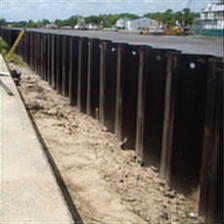

In [0]:
Image(autoencoder(stdardised.cuda())[0].data)

In [0]:
autoencoder(stdardised.cuda())[0].data.shape

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


torch.Size([3, 224, 224])

In [0]:
autoencoder.encode(stdardised.cuda()).shape

torch.Size([1, 64, 112, 112])

In [0]:
autoencoder.encode(stdardised.cuda())[0].data[:3].shape

torch.Size([3, 112, 112])

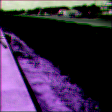

In [0]:
Image(autoencoder.encode(stdardised.cuda())[0].data[0:3] / 2.1155)

In [0]:
class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor = 2, mode = 'bilinear'),
            nn.Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
            nn.ReLU(inplace=True)
        )
        
    def encode(self,x): return self.encoder(x)
    
    def decode(self,x): return torch.clamp(self.decoder(x), min = 0, max=1)
        

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return torch.clamp(decoded, min=0, max=1)